In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy . interpolate import UnivariateSpline
import scipy.integrate as integ
from scipy.optimize import root

# Ejercicio de elementos finitos en una dimensión


## Ejercicio

Recuerda el ejemplo que vimos de una ecuación lineal para los desplazamientos de una viga:

$$
w''(x) = \frac{S}{EI}w(x) + \frac{q}{2EI}x(x-l)\; 0<x<l
$$

Con un análisis más fino, se puede derivar esta otra ecuación, que también modeliza los desplazamientos de una viga sujeta en los extremos, bajo una carga uniforme:

$$
\frac{w''(x)}{(1 + w'(x)^2)^{3/2}} = \frac{S}{EI}w(x) + \frac{q}{2EI}x(x-l)\; 0<x<l
$$

Al contrario que la anterior, esta ecuación no es lineal.
Sin embargo, se afirma que la ecuación del apartado anterior es una buena aproximación si los desplazamientos son pequeños.

1. Resuelve las dos ecuaciones para los mismos valores de las constantes:

($l=120, E=3\cdot 10^{7}, S=1000, I=625, q=100$).

    Calcula el máximo de la diferencia entre la solución encontrada con este método y la encontrada con el anterior. 
    
2. Repite el apartado anterior para una carga q=100000.

In [6]:
l = 120
Q = 100
E = 3e7
S = 1e3
I = 625

def fun(x,ys):
    'Define la EDO'
    y, yp = ys
    return [yp, ((S/(E*I))*y  + (Q*x/(2*E*I))*(x-l))]

def fun_NL(x,ys):
    'Define la EDO'
    y, yp = ys
    return [yp, (1+yp**2)**(3/2)*((S/(E*I))*y  + (Q*x/(2*E*I))*(x-l))]

# Las condiciones en los extremos
a, b = 0, l
alpha, beta = 0, 0
def bc(ya, yb):
    return np.array([ya[0] - alpha, yb[0] - beta])

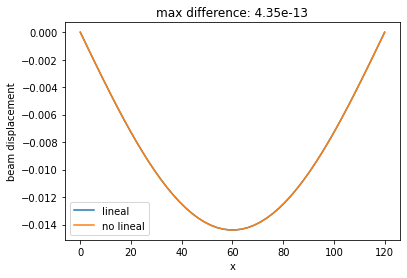

In [7]:
N = 50
xs = np.linspace(0, l, N)
ys = np.zeros((2, N))
sol = integ.solve_bvp(fun, bc, xs, ys)
sol_NL = integ.solve_bvp(fun_NL, bc, xs, ys)
plt.title('max difference: %.2e'%max(np.abs(sol['y'][0,:] - sol_NL['y'][0,:])))
plt.xlabel('x')
plt.ylabel('beam displacement')
plt.plot(sol['x'], -sol['y'][0,:], label='lineal')
plt.plot(sol_NL['x'], -sol_NL['y'][0,:], label='no lineal')
plt.legend()

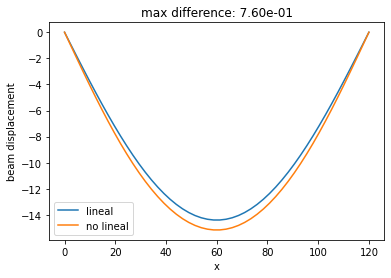

In [9]:
Q = 100000

def fun(x,ys):
    'Define la EDO'
    y, yp = ys
    return [yp, ((S/(E*I))*y  + (Q*x/(2*E*I))*(x-l))]

def fun_NL(x,ys):
    'Define la EDO'
    y, yp = ys
    return [yp, (1+yp**2)**(3/2)*((S/(E*I))*y  + (Q*x/(2*E*I))*(x-l))]

N = 50
xs = np.linspace(0, l, N)
ys = np.zeros((2, N))
sol = integ.solve_bvp(fun, bc, xs, ys)
sol_NL = integ.solve_bvp(fun_NL, bc, xs, ys)
plt.title('max difference: %.2e'%max(np.abs(sol['y'][0,:] - sol_NL['y'][0,:])))
plt.xlabel('x')
plt.ylabel('beam displacement')
plt.plot(sol['x'], -sol['y'][0,:], label='lineal')
plt.plot(sol_NL['x'], -sol_NL['y'][0,:], label='no lineal')
plt.legend()

## Ejercicio

Nos dicen que si el desplazamiento supera 0.1 en algún punto de la viga, la estructura está en peligro.

 - Plantea una función que a una carga Q asigna el máximo desplazamiento a lo largo de la viga.
 - La función anterior debería ser creciente: a mayor carga, mayor desplazamiento. Busca el valor de Q para el que el máximo desplazamiento es 0.1

In [ ]:
def max_despl(Q):
    def fun(x,ys):
        'Define la EDO'
        y, yp = ys
        return [yp, ((S/(E*I))*y  + (Q*x/(2*E*I))*(x-l))]
    sol = integ.solve_bvp(fun, bc, xs, ys)
    return max(np.abs(sol['y'][0,:]))


In [5]:
l = 120
E = 3e7
S = 1e3
I = 625

# Las condiciones en los extremos
a, b = 0, l
alpha, beta = 0, 0
def bc(ya, yb):
    return np.array([ya[0] - alpha, yb[0] - beta])

N = 50
xs = np.linspace(0, l, N)
ys = np.zeros((2, N))
max_despl = 0.1

def compare_max_despl(Q):
    def fun(x,ys):
        'Define la EDO'
        y, yp = ys
        return [yp, ((S/(E*I))*y  + (Q*x/(2*E*I))*(x-l))]
    sol = integ.solve_bvp(fun, bc, xs, ys)
    return max(np.abs(sol['y'][0,:])) - 0.1

sol_Q_root = root(compare_max_despl, 100)
sol_Q_root

    fjac: array([[-1.]])
     fun: 0.0
 message: 'The solution converged.'
    nfev: 5
     qtf: array([1.38777878e-17])
       r: array([-0.00014392])
  status: 1
 success: True
       x: array([694.84592033])

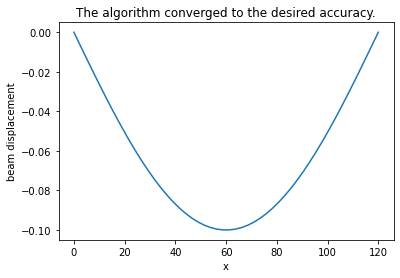

In [6]:
Q = sol_Q_root['x'][0]

def fun(x,ys):
    'Define la EDO'
    y, yp = ys
    return [yp, ((S/(E*I))*y  + (Q*x/(2*E*I))*(x-l))]

sol = integ.solve_bvp(fun, bc, xs, ys)
plt.title(sol['message'])
plt.xlabel('x')
plt.ylabel('beam displacement')
plt.plot(sol['x'], -sol['y'][0,:])

### Ejercicio

La [ecuación de van der Pol](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) modeliza ciertos circuitos eléctricos, entre otras cosas:

    The Van der Pol oscillator was originally proposed by the Dutch electrical engineer and physicist Balthasar van der Pol while he was working at Philips. Van der Pol found stable oscillations, which he subsequently called relaxation-oscillations and are now known as a type of limit cycle in electrical circuits employing vacuum tubes.
    
La ecuación para la corriente que fluye por cierta parte del circuito es:
$$
{\displaystyle {d^{2}x \over dt^{2}}-\mu (1-x^{2}){dx \over dt}+x=0.}
$$

  - Para $\mu = 8.5$, resolved el problema de valor inicial $x(0)=0, x'(0)=1$, hasta alcanzar $t=50$.
  - Para $\mu=0.5$, dibujad un diagrama de fases con varias trayectorias con condiciones iniciales $x(0)=0$, pero variando $x'(0)$.
  - Para $\mu=0.5$, resolved el problema de contorno $x(0)=0,x(2)=1$. Dibujad esta trayectoria en el diagrama de fases con un trazo más grueso.

Text(0.5, 1.0, '')

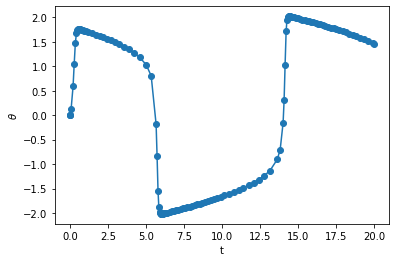

In [8]:
mu = 8.5

def vdp(t,y):
    x,v = y
    return np.array([v, mu*(1-x**2)*v - x])

t_span = [t0,tf] = [0,20]
# y = (theta, v)
y0 = np.array([0,1])

sol = integ.solve_ivp(
    vdp, t_span, y0, 
    method='RK45')

plt.plot(sol['t'], sol['y'][0,:], 'o-')
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.title('')

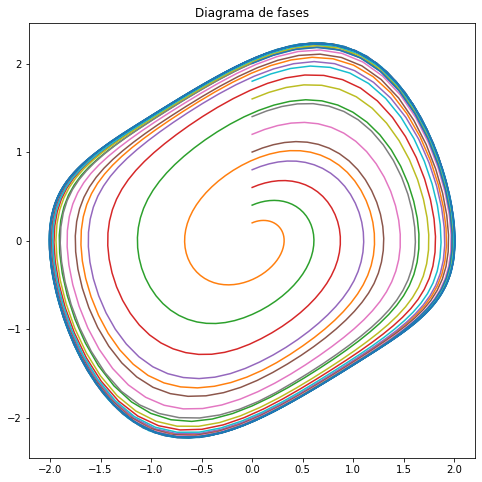

In [9]:
mu = 0.5
t0,tf = t_span = [0,20]
nframes = 200
ts = np.linspace(t0, tf, nframes)

plt.figure(figsize=(8,8))

for v0 in np.linspace(0,2,11):
    y0 = [0, v0]
    sol = integ.solve_ivp(
        vdp, t_span, y0, 
        method='RK45',
        t_eval=ts
    )
    plt.plot(sol['y'][0,:], sol['y'][1,:])
    
plt.title('Diagrama de fases')
plt.show()

In [10]:
# Las condiciones en los extremos
a, b = 0, 2
alpha, beta = 0, 1
def bc(ya, yb):
    return np.array([ya[0] - alpha, yb[0] - beta])

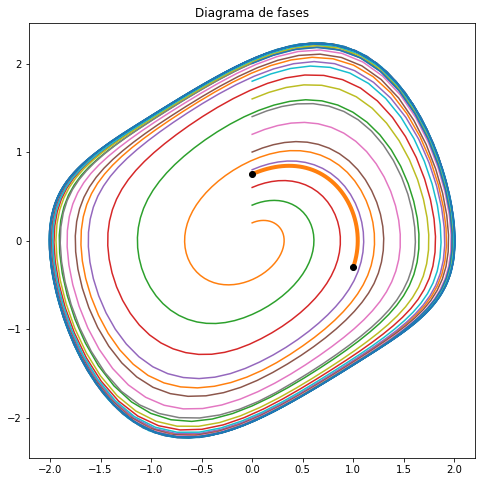

In [37]:
mu = 0.5
t0,tf = t_span = [0,20]
nframes = 200
ts = np.linspace(t0, tf, nframes)

plt.figure(figsize=(8,8))

for v0 in np.linspace(0,2,11):
    y0 = [0, v0]
    sol = integ.solve_ivp(
        vdp, t_span, y0, 
        method='RK45',
        t_eval=ts
    )
    plt.plot(sol['y'][0,:], sol['y'][1,:])

N = 50
xs = np.linspace(a, b, N)
ys = np.zeros((2,N))
sol = integ.solve_bvp(vdp, bc, xs, ys) 
plt.plot(sol['y'][0,:], sol['y'][1,:], linewidth=4)
plt.plot(sol['y'][0,[0,-1]], sol['y'][1,[0,-1]], 'ko')
plt.title('Diagrama de fases')
plt.show()